## Data Exploration

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vansh\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [24]:
import pandas as pd
import numpy as np
books = pd.read_csv(f"{path}/books.csv")

In [25]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [26]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [27]:
books.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [28]:
for col in books.columns:
    print(col , ": " , books[col].nunique())

isbn13 :  6810
isbn10 :  6810
title :  6398
subtitle :  2009
authors :  3780
categories :  567
thumbnail :  6481
description :  6474
published_year :  94
average_rating :  200
num_pages :  915
ratings_count :  3881


In [29]:
books.isna()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,False,False,False,False,False,False,False,False,False,False,False,False
6806,False,False,False,True,False,False,False,True,False,False,False,False
6807,False,False,False,True,False,False,True,True,False,False,False,False
6808,False,False,False,True,False,False,False,False,False,False,False,False


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

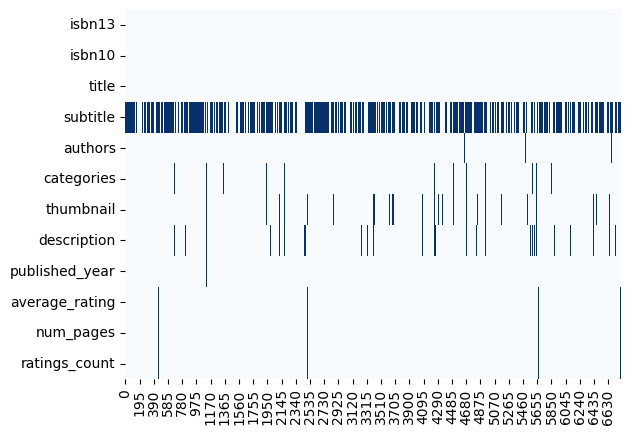

In [31]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cmap="Blues", ax = ax, cbar = False)
plt.show()

In [32]:
books["missing_desc"] = np.where(books.description.isna(),1,0)
books["age"] = 2025 - books.published_year

In [33]:
books[books.missing_desc == 1].head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc,age
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0


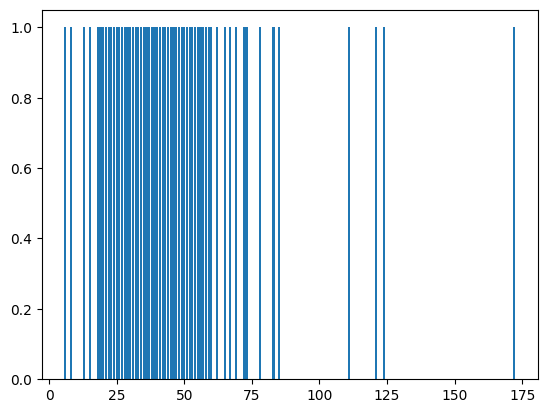

In [34]:
plt.bar(books.age,books.missing_desc)
plt.show()

In [35]:
missing_avg_age = books[books.missing_desc == 1]
print(np.mean(missing_avg_age.age))

35.71647509578544


In [36]:
books_no_missing = books[~(books.description.isna()) & ~(books.published_year.isna()) & ~(books.average_rating.isna()) & ~(books.num_pages.isna())]

In [37]:
books_no_missing.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc,age
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0


In [38]:
print(f"No. of unique categories: {books_no_missing.categories.nunique()}")
print(f"unique value counts: { books_no_missing.categories.value_counts().head(10)}, { books_no_missing.categories.value_counts().tail(10)}")

No. of unique categories: 531
unique value counts: categories
Fiction                      2523
Juvenile Fiction              534
Biography & Autobiography     391
History                       258
Literary Criticism            164
Philosophy                    154
Comics & Graphic Novels       152
Religion                      136
Drama                         126
Juvenile Nonfiction           114
Name: count, dtype: int64, categories
Disasters                       1
Bosnia and Herzegovina          1
Mars (Planet)                   1
Essays                          1
Identity (Psychology)           1
Courage                         1
Otherland (Imaginary place)     1
Animals                         1
Children of divorced parents    1
Catholic women                  1
Name: count, dtype: int64


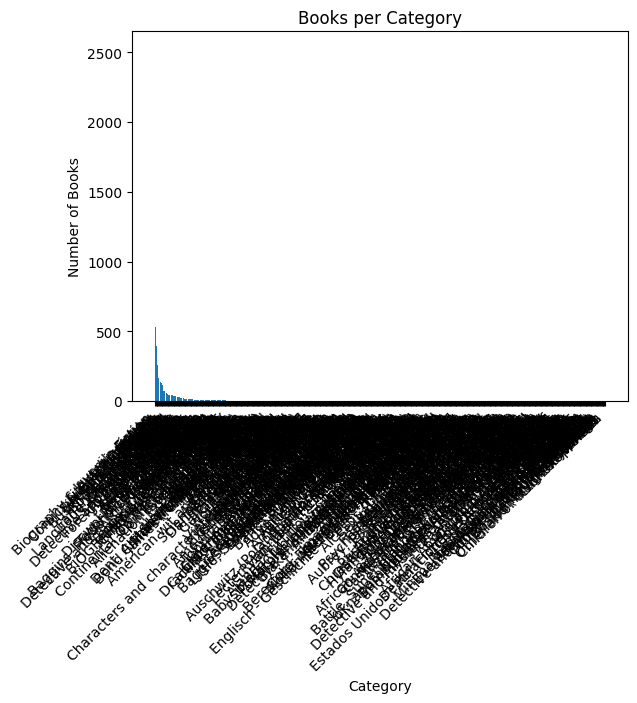

In [39]:
plt.bar(books_no_missing.categories.value_counts().index, books_no_missing.categories.value_counts().values)
plt.xlabel("Category")
plt.ylabel("Number of Books")
plt.title("Books per Category")
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
books_no_missing["len_desc"] = books_no_missing.description.apply(lambda x: len(str(x).split()))

C:\Users\vansh\AppData\Local\Temp\ipykernel_22140\1905552129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_no_missing["len_desc"] = books_no_missing.description.apply(lambda x: len(str(x).split()))


In [41]:
print(books_no_missing[books_no_missing.len_desc < 25].description.count())
books_no_missing[books_no_missing.len_desc < 25].description.head(20)

1310


2      Volume Two of Stephen Donaldson's acclaimed se...
6                                              Donation.
10     One of Sidney Sheldon's most popular and bests...
11                                        Fantasy-roman.
32     Tells the story of three generations of Chines...
36     A magical and fantastic collection of early st...
38     Koko is Peter Straub's foray into the psycholo...
57     A young drifter finds more than he bargained f...
68     A new 'The Doors of Perception' for the 21st c...
70     A matter of life and death - and the Throne of...
77                        Nonsense rhyming story. 4 yrs+
82     A boy imagines what it would be like if he had...
83     Tie your tongue in terrible knots as you try t...
84     A study guide for the novel There's a Boy in t...
90     An epic narrative that takes a look at slavery...
94     The title story in this collection of shorts n...
95     Depicts the inner-workings of the Hollywood mo...
100    Forty-nine stories refle

In [42]:
books_no_miss_25_words = books_no_missing[~(books_no_missing.len_desc<25)]

In [43]:
len(books_no_miss_25_words)

5197

In [44]:
books_no_miss_25_words["title_and_subtitle"] = np.where(
    books_no_miss_25_words["subtitle"].isna(),
    books_no_miss_25_words["title"],
    books_no_miss_25_words["title"] + ": " + books_no_miss_25_words["subtitle"]
)
books_no_miss_25_words["title_and_subtitle"].head(10)

C:\Users\vansh\AppData\Local\Temp\ipykernel_22140\1306042235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_no_miss_25_words["title_and_subtitle"] = np.where(


0                                                Gilead
1                                 Spider's Web: A Novel
3                                        Rage of angels
4                                        The Four Loves
5                                   The Problem of Pain
7     Empires of the Monsoon: A History of the India...
8                 The Gap Into Madness: Chaos and Order
9                                    Master of the Game
12                                  Warhost of Vastmark
13                             The Once and Future King
Name: title_and_subtitle, dtype: object

In [46]:
books_no_miss_25_words["tag_description"] = books_no_miss_25_words["isbn13"].astype(str) + " " + books_no_miss_25_words["description"]

C:\Users\vansh\AppData\Local\Temp\ipykernel_22140\2002799733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_no_miss_25_words["tag_description"] = books_no_miss_25_words["isbn13"].astype(str) + " " + books_no_miss_25_words["description"]


In [47]:
books_no_miss_25_words.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc,age,len_desc,title_and_subtitle,tag_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0,80,Empires of the Monsoon: A History of the India...,9780006380832 Until Vasco da Gama discovered t...
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0,160,The Gap Into Madness: Chaos and Order,9780006470229 A new-cover reissue of the fourt...
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0,30,Master of the Game,9780006472612 Kate Blackwell is an enigma and ...
12,9780006482079,0006482074,Warhost of Vastmark,NaN,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,0,30.0,136,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...
13,9780006483014,0006483011,The Once and Future King,NaN,Terence Hanbury White,Arthurian romances,http://books.google.com/books/content?id=Jx6Bv...,An omnibus volume of the author's complete sto...,1996.0,4.04,823.0,2805.0,0,29.0,46,The Once and Future King,9780006483014 An omnibus volume of the author'...


In [50]:
books_cleaned = books_no_miss_25_words.drop(columns=["missing_desc", "subtitle", "age", "len_desc"])
books_cleaned

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tag_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [52]:
books_cleaned.to_csv("books_cleaned.csv", index=False)